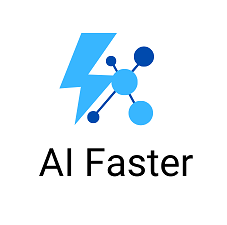

Ngoài web machinelearningcoban mọi người có thể tham khảo thêm ebook này cùng 1 tác giả với trang web nhưng có những cái mới hơn https://github.com/tiepvupsu/ebookMLCB/blob/master/book_ML_color.pdf
### Lab ôn tập Logistic resgression

**Viết chương trình để xử lý bài toán phân biệt hai chữ số viết tay  0 và 1 trong bộ cơ sở dữ liệu MNIST bằng Logistic resgression và KNN. So sánh kết quả của 2 mô hình và hiển thị các trường hợp dự đoán sai (nếu có)**



Kích thước của bộ dữ liệu MNIST của tensorflow lớn hơn của sklearn nên sẽ có kết quả tốt hơn

Trước tiên nên install thư viện tensorflow 

In [31]:
# !pip install tensorflow

In [32]:
from sklearn import datasets, neighbors
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [33]:
# Tải bộ dữ liệu MNIST từ TensorFlow
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# In thông tin về dữ liệu
print("Kích thước dữ liệu huấn luyện:", x_train.shape)
print("Kích thước nhãn huấn luyện:", y_train.shape)
print("Kích thước dữ liệu kiểm tra:", x_test.shape)
print("Kích thước nhãn kiểm tra:", y_test.shape)


Kích thước dữ liệu huấn luyện: (60000, 28, 28)
Kích thước nhãn huấn luyện: (60000,)
Kích thước dữ liệu kiểm tra: (10000, 28, 28)
Kích thước nhãn kiểm tra: (10000,)


# Các cặp số giống nhau nhất

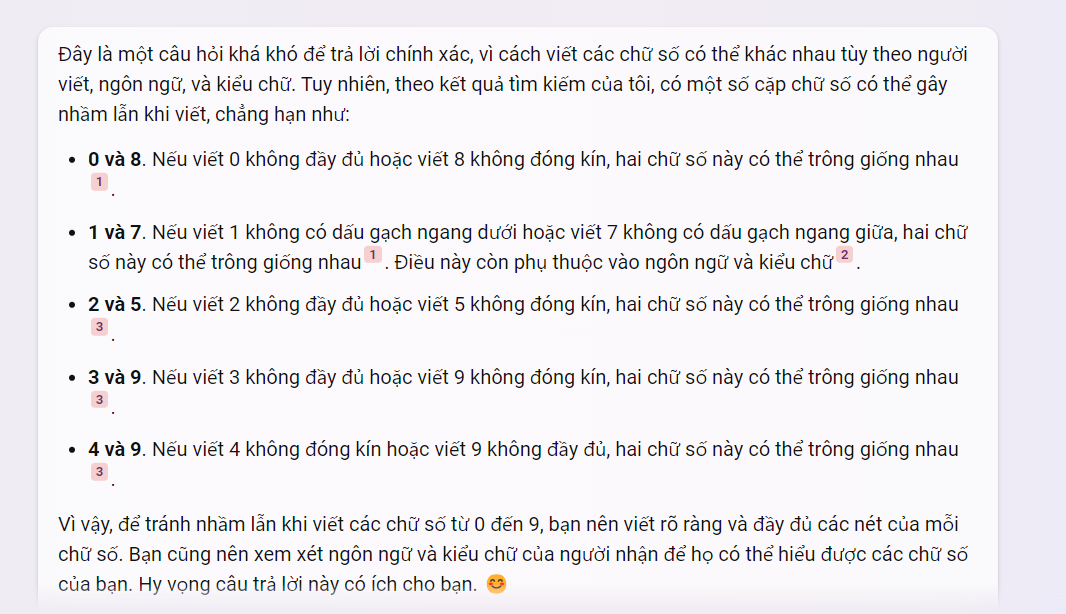

### Tách cặp số

In [34]:
num1, num2 = 0, 8

In [35]:
len(x_train[0])

28

In [36]:
(y_train[0])

5

In [37]:
X_train_new = []
y_train_new = []
for i in range(len(x_train)):
    if y_train[i] == num1 or y_train[i] == num2:
        X_train_new.append(x_train[i])
        y_train_new.append(y_train[i])

In [38]:
print(len(X_train_new), len(y_train_new))

11774 11774


In [39]:
X_test_new = []
y_test_new = []
for i in range(len(x_test)):
    if y_test[i] == num1 or y_test[i] == num2:
        X_test_new.append(x_test[i])
        y_test_new.append(y_test[i])

In [40]:
print(len(X_test_new), len(y_test_new))

1954 1954


(array([5923.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5851.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

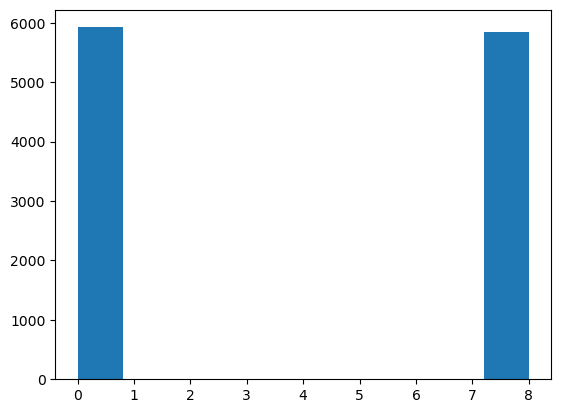

In [41]:
plt.hist(y_train_new)

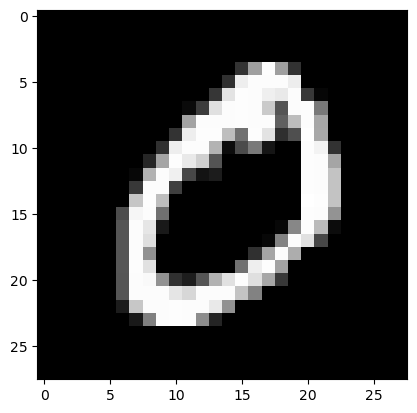

In [42]:
img1 = X_train_new[0]
plt.gray()
plt.imshow(img1)

# P1 KNN

### Feature engineering KNN

In [43]:
X_train_new_ = np.array(X_train_new).reshape(-1, 28*28)
X_test_new_ = np.array(X_test_new).reshape(-1, 28*28)

### Train model KNN với sklearn

In [44]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_new_, y_train_new)
y_predict = knn.predict(X_test_new_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Hàm tính accuracy và trường hợp fail

In [45]:
def cal_accuracy_score(predict, labels):
    count = 0
    list_index_fail = []
    for i in range(len(predict)):
        if predict[i] == labels[i]:
            count += 1
        else:
            list_index_fail.append(i)

    accuracy = count / len(predict)
    return accuracy, list_index_fail

### Accuracy

In [46]:
acc, fail = cal_accuracy_score(y_predict, y_test_new)

In [47]:
print("accuracy: ", acc)

accuracy:  0.9948822927328557


### Case fail

In [48]:
fail

[80, 233, 312, 334, 537, 677, 686, 911, 1288, 1881]

[0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


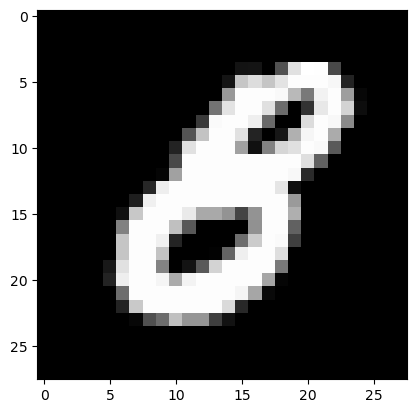

In [49]:
img1 = X_test_new_[686]
plt.gray()
plt.imshow(img1.reshape(28, 28))
print(knn.predict([X_test_new_[686]]))

[0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


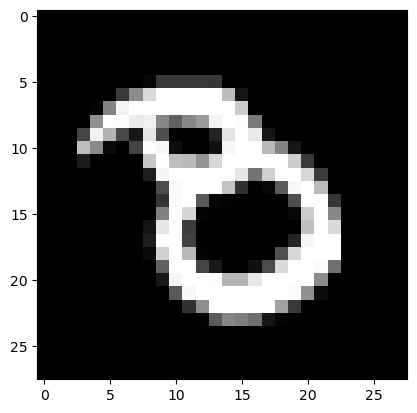

In [50]:
img1 = X_test_new_[233]
plt.gray()
plt.imshow(img1.reshape(28, 28))
print(knn.predict([X_test_new_[233]]))

### Train model KNN code chay

In [51]:
X_train_new_ = np.array(X_train_new).reshape(-1, 28*28) / 255
X_test_new_ = np.array(X_test_new).reshape(-1, 28*28) / 255

In [52]:
from math import sqrt
import operator

def cal_distances(p1, p2):
	# a -> b = sqrt((xa - xb)**2 + (ya - yb)**2 + (za - zb)**2 )
	dimension = len(p1) # Số chiều
	distance = 0
	for i in range(dimension):
		distance += (p1[i] - p2[i]) * (p1[i] - p2[i])

	return sqrt(distance)


def get_k_neighbors(train_X, label_y, point, k): # Lấy k point gần nhất
	distances = [] # Danh sach chua kc cac diem den point
	neighbors_labels = [] 
	
	for i in range(len(train_X)):
		distance = cal_distances(train_X[i], point)
		distances.append((distance, label_y[i])) 

	distances.sort(key = operator.itemgetter(0))

	for i in range(k):
		neighbors_labels.append(distances[i][1])

	return neighbors_labels


def highest_votes(labels): # Xem label phổ biến nhất và return
	labels_count = [0, 0]

	for label in labels:
		labels_count[label] += 1

	return labels_count.index(max(labels_count))

def predict(train_X, label_y, point, k):
	neighbors_labels = get_k_neighbors(train_X, label_y, point, k)
	return highest_votes(neighbors_labels)

def accuracy_score(predict, labels):
	count = 0
	for i in range(len(predict)):
		if predict[i] == labels[i]:
			count += 1

	accuracy = count / len(predict)
	return accuracy


In [53]:
# for i in range(len(y_test_new)):
#     if y_test_new[i] == 8:
#         y_test_new[i] = 1
# for i in range(len(y_train_new)):
#     if y_train_new[i] == 8:
#         y_train_new[i] = 1

In [54]:
# y_predict = []
# k = 5

# for p in X_test_new_:
# 	label = predict(X_train_new_, y_train_new, p, k)
# 	y_predict.append(label)

# # print(y_predict)
# # print(y_test)

# print("Accuracy: ", accuracy_score(y_predict, y_test_new))

# P2 Logistic regression

In [55]:
# Khởi tạo mô hình
model = LogisticRegression()

# Huấn luyện mô hình trên dữ liệu huấn luyện
model.fit(X_train_new_, y_train_new)

# Dự đoán nhãn của dữ liệu kiểm tra
y_pred = model.predict(X_test_new_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
# Tính độ chính xác
accuracy = accuracy_score(y_test_new, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9928352098259979


In [57]:
print(y_test_new, y_pred)

[0, 0, 0, 0, 0, 0, 8, 0, 0, 8, 0, 8, 0, 8, 8, 0, 8, 0, 0, 8, 8, 8, 0, 8, 0, 0, 0, 0, 8, 8, 8, 8, 0, 8, 8, 8, 8, 0, 0, 8, 8, 0, 0, 0, 8, 0, 0, 0, 0, 0, 8, 8, 0, 8, 0, 0, 8, 8, 0, 8, 8, 8, 0, 0, 8, 8, 8, 8, 0, 0, 0, 8, 0, 8, 8, 8, 8, 0, 8, 0, 8, 0, 8, 0, 8, 8, 8, 8, 0, 0, 0, 8, 0, 8, 0, 0, 8, 8, 0, 8, 0, 8, 0, 8, 0, 8, 8, 8, 0, 0, 0, 8, 8, 8, 0, 0, 8, 0, 0, 8, 8, 8, 8, 0, 0, 8, 0, 8, 0, 8, 0, 0, 0, 0, 8, 0, 8, 8, 8, 0, 8, 0, 8, 8, 0, 8, 8, 0, 0, 0, 8, 0, 8, 8, 8, 8, 8, 0, 0, 0, 8, 0, 8, 8, 0, 8, 8, 8, 0, 0, 8, 0, 0, 8, 0, 8, 0, 8, 8, 8, 8, 0, 0, 8, 0, 8, 8, 0, 8, 0, 8, 8, 8, 0, 8, 8, 0, 8, 0, 8, 0, 8, 0, 0, 0, 0, 8, 8, 8, 0, 0, 8, 0, 0, 8, 8, 0, 8, 0, 8, 8, 8, 0, 8, 8, 0, 0, 8, 8, 0, 0, 0, 8, 8, 8, 8, 8, 0, 8, 8, 8, 0, 8, 0, 8, 8, 0, 0, 0, 0, 8, 0, 8, 8, 0, 8, 8, 0, 0, 0, 8, 0, 8, 8, 0, 8, 8, 0, 0, 8, 8, 0, 8, 0, 0, 0, 8, 8, 0, 8, 8, 0, 8, 8, 0, 8, 8, 8, 8, 0, 0, 0, 8, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8, 8, 8, 0, 8, 0, 8, 0, 0, 0, 8, 8, 0, 0, 0, 8, 0, 8, 0, 8, 8, 0, 0, 0, 8, 0, 0, 8, 0, 0, 0, 

In [58]:
acc, fail = cal_accuracy_score(y_pred, y_test_new)

In [59]:
print("Accuracy: ", acc, '\n', fail)

Accuracy:  0.9928352098259979 
 [59, 80, 233, 312, 386, 419, 424, 537, 767, 911, 929, 1103, 1288, 1881]


[8]
0


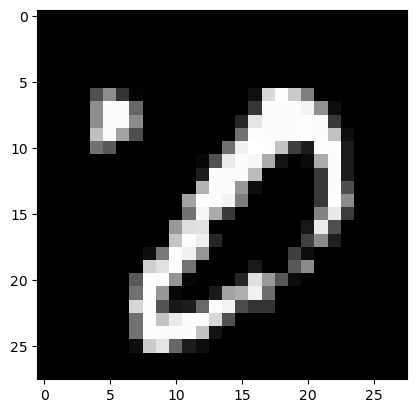

In [61]:
img1 = X_test_new_[1881]
plt.gray()
plt.imshow(img1.reshape(28, 28))
print(model.predict([X_test_new_[1881]]))
print(y_test_new[1881])